In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install python-bidi
!{sys.executable} -m pip install arabic_reshaper
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_dat

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper

%matplotlib inline

In [ ]:
# Mounting Google Drive
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
#path = './gdrive/My Drive/SharedFolder/Data_and_Code/'
#path = './gdrive/My Drive/KSUSentAnalysisWorkshop/SharedFolder/Data_and_Code/'
path = './gdrive/My Drive/SWE486Team2/Data_and_Code/'


Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
data_df=pd.read_csv('/content/gdrive/MyDrive/SWE486Team2 /Data_and_Code/final_reviews_cleaned.csv') 


In [ ]:
# remove data with NAN sentiment
data_df=data_df[~data_df["sentiment"].isna()]
data_df=data_df[~data_df["reviews"].isna()]

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["reviews"].apply(tokenizer.tokenize)

In [ ]:
data_df.drop(data_df.columns[data_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1071477 words total, with a vocabulary size of 97271
Max sentence length is 758


In [ ]:
# count the number of words
word_counter = Counter(all_words)

In [ ]:
# show the most common words
word_counter.most_common(10)

[('الفندق', 19776),
 ('ا', 12643),
 ('جدا', 11815),
 ('فندق', 9730),
 ('رائع', 6260),
 ('الغرف', 6043),
 ('جيد', 5539),
 ('الغرفة', 4346),
 ('الطعام', 3751),
 ('مكان', 3552)]

In [ ]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('میکنم', 1),
 ('رایگان', 1),
 ('خیابون', 1),
 ('کلی', 1),
 ('سوپر', 1),
 ('مارکت', 1),
 ('غذاخوری', 1),
 ('اطرافش', 1),
 ('پشیمون', 1),
 ('نمیشید', 1)]

In [ ]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(20)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

In [ ]:
word_df.head()

NameError: ignored

> For those positive reviews, what are the most common used words?

---



In [ ]:
for_df=data_df[data_df["sentiment"]=="Positive"]

In [ ]:
For_words = [ word for tokens in for_df["tokens"] for word in tokens]
for_word_counter = Counter(For_words)
for_word_counter.most_common(20)

[('الفندق', 12529),
 ('جدا', 7993),
 ('ا', 7912),
 ('فندق', 6811),
 ('رائع', 5465),
 ('جيد', 3721),
 ('الغرف', 3591),
 ('رائعة', 2837),
 ('ممتاز', 2659),
 ('مكان', 2441),
 ('لقد', 2356),
 ('الطعام', 2342),
 ('جميل', 2202),
 ('جيدة', 2145),
 ('المكان', 2137),
 ('الغرفة', 2023),
 ('للغاية', 1981),
 ('كنت', 1902),
 ('خدمة', 1819),
 ('يوجد', 1787)]

In [ ]:
# stop words
ignore = {'جدا','ا','لقد','كنت','الفندق'
          ,'المكان','الغرفة','الطعام'
          'الفندق ','فندق','يوجد','شيء','مرة','غرفة','الغرف', 'مكان', 'المكان','خدمة','موقع','جد','العمل','السباحة','أخرى','الإفطار', 'العاملين', 'حمام','فريق', 'العمل', 'الفنادق','يقع'}
          # remove stop words from the list of words
for word in ignore:
    if word in for_word_counter:
        del for_word_counter[word]

In [ ]:
for_word_counter.most_common(20)

[('الفندق', 12529),
 ('جدا', 7993),
 ('ا', 7912),
 ('فندق', 6811),
 ('رائع', 5465),
 ('جيد', 3721),
 ('الغرف', 3591),
 ('رائعة', 2837),
 ('ممتاز', 2659),
 ('مكان', 2441),
 ('لقد', 2356),
 ('الطعام', 2342),
 ('جميل', 2202),
 ('جيدة', 2145),
 ('المكان', 2137),
 ('الغرفة', 2023),
 ('للغاية', 1981),
 ('كنت', 1902),
 ('خدمة', 1819),
 ('يوجد', 1787)]

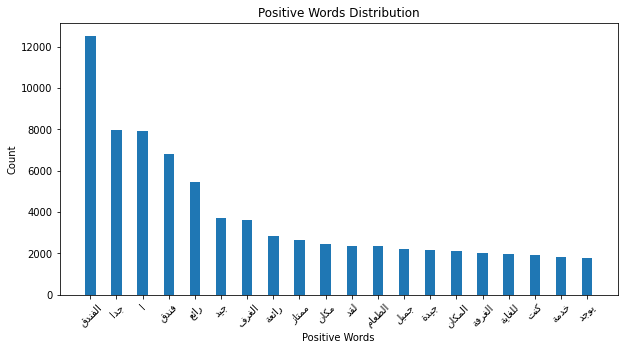

In [ ]:
common_positive_words = for_word_counter.most_common(20)
positiveWords_df = pd.DataFrame(common_positive_words, columns =['word', 'count'])
array = [] 
for i in positiveWords_df.word.values:
  array.append(get_display(arabic_reshaper.reshape(f'{i}')))
counts= list(positiveWords_df['count'])

fig = plt.figure(figsize = (10,5))
plt.bar(array,counts,width=0.4)
plt.xticks(rotation=45)

plt.xlabel("Positive Words")
plt.ylabel("Count")
plt.title("Positive Words Distribution")
plt.show()

In [ ]:
against_df=data_df[data_df["sentiment"]=="Negative"]

In [ ]:
against_words = [ word for tokens in against_df["tokens"] for word in tokens]

In [ ]:
against_word_counter = Counter(against_words)

In [ ]:
ignore = {'جدا','ا','لقد','كنت','الفندق'
          ,' المكان','الغرفة',' الطعام'
       'الطعام' , 'الفندق ','فندق','يوجد','شيء','مرة','غرفة','الغرف', 'مكان', 'المكان','خدمة','موقع','جد','العمل','السباحة','أخرى','الإفطار', 'العاملين', 'حمام','فريق', 'العمل', 'الفنادق','يقع','الاستقبال','جيد','أفضل','الساعة','الخدمة','المطعم','أنه','نجوم','للغاية','ولم','يتم','جيدة','علي','تكن','توجد','السرير','غرف','يكن','فقد','كنا','انا'}
for word in ignore:
    if word in against_word_counter:
        del against_word_counter[word]


In [ ]:
against_word_counter.most_common(20)

[('الطعام', 849),
 ('سيئة', 714),
 ('الحمام', 523),
 ('الأمر', 425),
 ('واحدة', 391),
 ('لمدة', 389),
 ('آخر', 385),
 ('الحجز', 349),
 ('الإطلاق', 344),
 ('وجود', 341),
 ('سيء', 339),
 ('الموقع', 337),
 ('أسوأ', 329),
 ('يجب', 328),
 ('يعمل', 326),
 ('الموظفين', 316),
 ('النزلاء', 313),
 ('السعر', 311),
 ('الكثير', 306),
 ('رائحة', 299)]

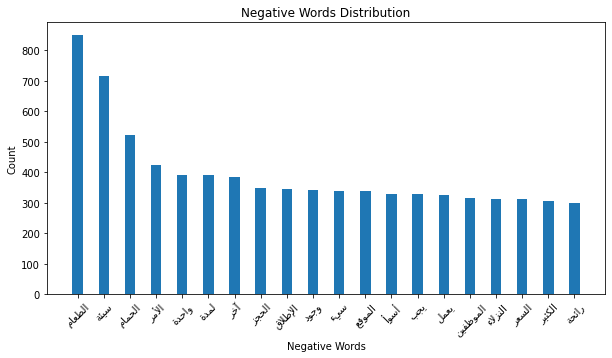

In [ ]:
common_neagtive_words = against_word_counter.most_common(20)
negtiveWords_df = pd.DataFrame(common_neagtive_words, columns =['word', 'count'])
array = [] 
for i in negtiveWords_df.word.values:
  array.append(get_display(arabic_reshaper.reshape(f'{i}')))
counts= list(negtiveWords_df['count'])

fig = plt.figure(figsize = (10,5))
plt.bar(array,counts,width=0.4)
plt.xticks(rotation=45)

plt.xlabel("Negative Words")
plt.ylabel("Count")
plt.title("Negative Words Distribution")
plt.show()

# **Distribution of Classification**

In [ ]:
reviews_classification = data_df["sentiment"].value_counts()

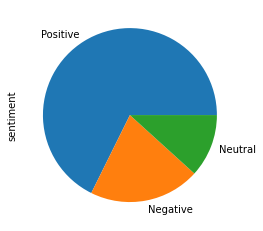

In [ ]:
reviews_classification.plot(kind = 'pie')

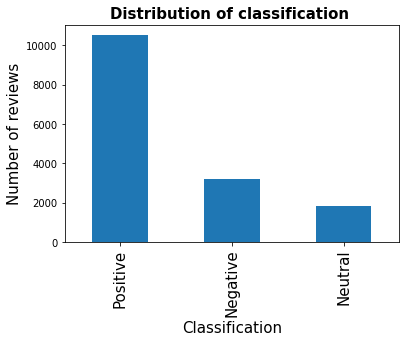

In [ ]:
fig,ax = plt.subplots()
ax.tick_params(axis='x' , labelsize=15)
ax.tick_params(axis='y' , labelsize=10)

ax.set_xlabel('Classification' , fontsize=15)
ax.set_ylabel('Number of reviews' , fontsize=15)
ax.set_title('Distribution of classification ' , fontsize=15, fontweight='bold')
reviews_classification.plot(ax=ax , kind='bar' )